<a href="https://colab.research.google.com/github/dongjae-shin/SegrDNN/blob/main/PCA_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Principal Component Analysis (PCA) including expt. data (220330):  
data_segr_11_unique-643, data_segr_12_643data

In [2]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt

# load data from github repository
path = 'https://raw.githubusercontent.com/shindj91/data_set/master/data_segr_11_unique-643.csv'
path_test = 'https://raw.githubusercontent.com/shindj91/data_set/master/data_segr_12_643data.csv'
path_expt = 'https://raw.githubusercontent.com/shindj91/data_set/master/data_segr_expt_19.csv'

data_set = read_csv(path, header=0)
data_set_test = read_csv(path_test, header=0)
data_set_expt = read_csv(path_expt, header=0)
# Change column name of expt data set (Esegr_expt -> Esegr)
data_set_expt_new = data_set_expt.rename(columns={'Esegr_expt': 'Esegr'})

data_set_tot = DataFrame(data=None)
data_set_tot = data_set_tot.append(data_set)
data_set_tot = data_set_tot.append(data_set_test)
data_set_tot = data_set_tot.append(data_set_expt_new)
data_set_tot = data_set_tot.reset_index().drop('index', axis=1)
# when the indices are reset, column named 'index' is generated.

# split into input and output
features = list(data_set_tot.columns)[:-1]
X_framed, y_framed = data_set_tot.loc[:, features], data_set_tot.loc[:, 'Esegr']
X_framed_train = data_set.loc[:, features]

# # Max-min normalization only for X
# X_scaled = ( (X_framed-X_framed_train.min()) / (X_framed_train.max()-X_framed_train.min()) )

# Mean normalization only for X
X_scaled = ( (X_framed-X_framed_train.mean()) / (X_framed_train.max()-X_framed_train.min()) )
X, y = X_scaled.values, y_framed.values

# # from sklearn.preprocessing import StandardScaler
# # data_set_framed

# # x = data_set_framed.loc[:, features].values
# # x = StandardScaler().fit_transform(x) # normalizing the features

# # feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
# # normalized_x = DataFrame(x, columns=feat_cols)
# # normalized_x.tail()



<ipython-input-2-88fd56f16556>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_set_tot = data_set_tot.append(data_set)
<ipython-input-2-88fd56f16556>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_set_tot = data_set_tot.append(data_set_test)
<ipython-input-2-88fd56f16556>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_set_tot = data_set_tot.append(data_set_expt_new)


In [3]:
data_set_tot.query("del_CN == 1").index.tolist()

[1231,
 1238,
 1245,
 1252,
 1259,
 1266,
 1273,
 1280,
 1287,
 1294,
 1301,
 1308,
 1315,
 1322,
 1329,
 1336,
 1343,
 1350,
 1357,
 1364]

In [4]:
# splitting for 6th fold of 1226 data model (obtained by 211112_rand_seed_seg_all_HAIL.ipynb)
ind_train=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 170, 171, 174, 175, 177, 178, 179, 180, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 367, 369, 370, 371, 372, 373, 374, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 391, 392, 394, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 413, 415, 416, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 445, 446, 447, 448, 449, 451, 452, 453, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 469, 470, 471, 472, 473, 474, 476, 477, 478, 479, 480, 481, 482, 484, 485, 486, 487, 488, 489, 490, 492, 493, 494, 496, 497, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 517, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 588, 589, 590, 591, 592, 593, 594, 596, 597, 598, 599, 600, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 669, 670, 671, 672, 673, 674, 676, 677, 678, 680, 681, 682, 683, 684, 685, 686, 687, 689, 690, 691, 692, 693, 695, 696, 697, 698, 699, 700, 702, 703, 704, 705, 706, 707, 708, 709, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 738, 739, 740, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 810, 811, 812, 815, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 885, 886, 888, 889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 904, 905, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 921, 922, 923, 926, 928, 929, 930, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 988, 989, 990, 991, 992, 993, 995, 997, 998, 999, 1000, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1076, 1078, 1079, 1080, 1081, 1082, 1085, 1086, 1087, 1088, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1147, 1148, 1149, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1174, 1175, 1176, 1177, 1178, 1181, 1182, 1183, 1184, 1185, 1188, 1189, 1190, 1191, 1192, 1194, 1195, 1196, 1197, 1198, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224]
ind_valid=[11, 18, 24, 28, 41, 61, 69, 73, 74, 89, 90, 108, 114, 125, 131, 132, 164, 169, 172, 173, 176, 181, 185, 193, 214, 232, 234, 251, 264, 272, 278, 300, 326, 338, 366, 368, 375, 383, 393, 395, 396, 412, 414, 417, 444, 450, 454, 456, 468, 475, 483, 491, 495, 498, 499, 500, 516, 518, 530, 547, 568, 587, 595, 601, 604, 616, 657, 668, 675, 679, 688, 694, 701, 710, 737, 741, 752, 765, 787, 788, 809, 813, 814, 816, 839, 855, 884, 887, 892, 903, 906, 920, 924, 925, 927, 931, 945, 964, 965, 987, 994, 996, 1001, 1011, 1026, 1036, 1075, 1077, 1083, 1084, 1089, 1091, 1107, 1146, 1150, 1173, 1179, 1180, 1186, 1187, 1193, 1199, 1225]

In [5]:
plt.rcParams["mathtext.default"] = "it" # non-italic math fonts: 'rm'
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 22
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

## 1.PCA result

<ipython-input-6-66fe42d244d8>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(principalComponents_data_framed.loc[ind_valid, 'PC 1'],
<ipython-input-6-66fe42d244d8>:50: UserWarning: You passed a edgecolor/edgecolors ([0.0, 0.0, 0.0, 0.0]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(principalComponents_data_framed.loc[ind_11, 'PC 1'],


<Figure size 640x480 with 0 Axes>

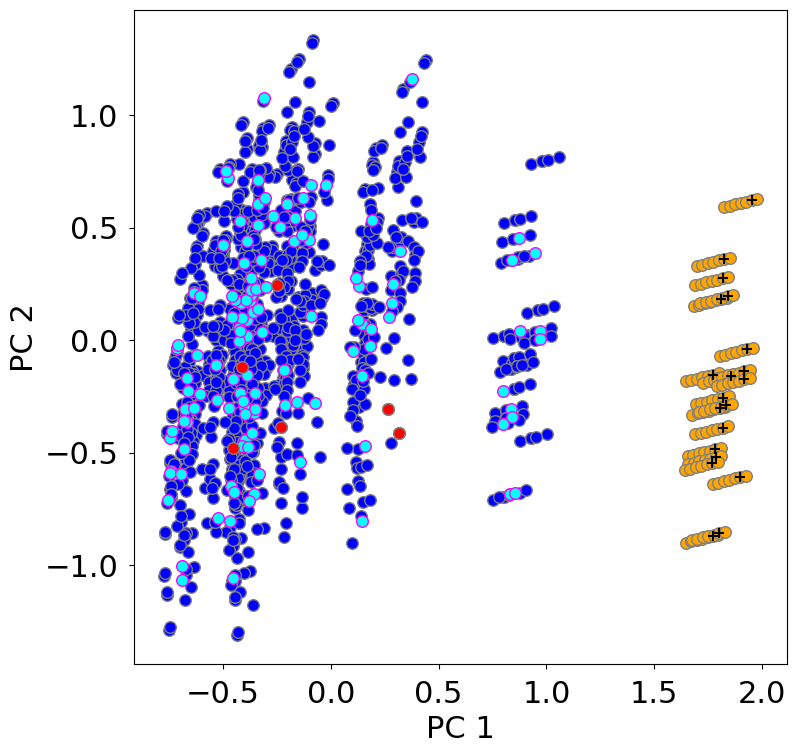

In [6]:
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
pca_data = PCA(n_components=4, svd_solver='randomized') # SparsePCA(n_components=4, alpha=1) # KernelPCA(n_components=4, kernel='rbf', gamma=0.5)
principalComponents_data = pca_data.fit_transform(X)
principalComponents_data_framed = DataFrame(data = principalComponents_data,
                  columns = ['PC 1',
                             'PC 2',
                             'PC 3',
                             'PC 4'])
principalComponents_data_framed.tail()

# for feature in features + ['Esegr']:
for feature in ['Esegr']:
  plt.figure()
  plt.figure(figsize=(8.7,8.5))
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=14)
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  # plt.title("Principal Component Analysis of Surface Energy Dataset",fontsize=20)

  s=70 # marker size

  # training data (1226 data)
  #plt.scatter(principalComponents_data_framed.loc[:1225, 'PC 1'],
  #            principalComponents_data_framed.loc[:1225, 'PC 2'],
  #            c=data_set_tot.loc[:1225,feature].values,
  #            edgecolors='gray', s=s)

  # training data (9folds data for 6th fold)
  plt.scatter(principalComponents_data_framed.loc[ind_train, 'PC 1'],
              principalComponents_data_framed.loc[ind_train, 'PC 2'],
              c='blue',
              edgecolors='gray', s=s,
              label='Training data')
  # validation data (1folds data for 6th fold)
  plt.scatter(principalComponents_data_framed.loc[ind_valid, 'PC 1'],
              principalComponents_data_framed.loc[ind_valid, 'PC 2'],
              c=[0.0,1.0,1.0,1.0],
              edgecolors='magenta', s=s,
              label='Validation data')

  # test data (140 data; (643) facet)
  plt.scatter(principalComponents_data_framed.loc[1226:1365, 'PC 1'],
              principalComponents_data_framed.loc[1226:1365, 'PC 2'],
              c='orange', edgecolors='gray', s=s,
              label='Test data; (643) facet')
  # test data (20 data; CN=11)
  ind_11 = data_set_tot.query("del_CN == 1").index.tolist()
  ind_11 = [i for i in ind_11]
  plt.scatter(principalComponents_data_framed.loc[ind_11, 'PC 1'],
              principalComponents_data_framed.loc[ind_11, 'PC 2'],
              c='k', edgecolors=[0.0,0.0,0.0,0.0], s=50,
              label='Test data; CN=11', marker='+')
  # expt. data (6 data; SCLS)
  plt.scatter(principalComponents_data_framed.loc[1366:, 'PC 1'],
              principalComponents_data_framed.loc[1366:, 'PC 2'],
              c='r', edgecolors='gray', s=s,
              label='Expt. data')

  # for idx in range(6):
  #   plt.text(principalComponents_data_framed.loc[1365+idx, 'PC 1']+0.02,
  #            principalComponents_data_framed.loc[1365+idx, 'PC 2']+0.02,
  #            s='{0:1.2f}'.format(data_set_expt.loc[idx, 'Esegr_expt']))

  #plt.xlim((-1.,2.2))
  #plt.ylim((-1.5,2.7))
  # cb = plt.colorbar()
  # cb.set_label('$E_{segr}$')
  # plt.legend(loc='upper right', fontsize=12)
  plt.gcf().subplots_adjust(left=0.15)
  plt.savefig(fname='./PCA_dataset.png', dpi=300)
  # plt.show()

## 2.Joint plot (seaborn)

In [7]:
import seaborn as sns

In [8]:
principalComponents_data_framed['data_type']='TBD'

#training
principalComponents_data_framed.loc[ind_train, 'data_type'] = 'Training data'
#validation
principalComponents_data_framed.loc[ind_valid, 'data_type'] = 'Validation data'
#test 140
principalComponents_data_framed.loc[1226:1365, 'data_type'] = 'Test data; (643) facet'
#test 20
principalComponents_data_framed.loc[ind_11, 'data_type'] = 'Test data; CN=11'
#expt.
principalComponents_data_framed.loc[1366:, 'data_type'] = 'Expt. data'

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


<Figure size 640x480 with 0 Axes>

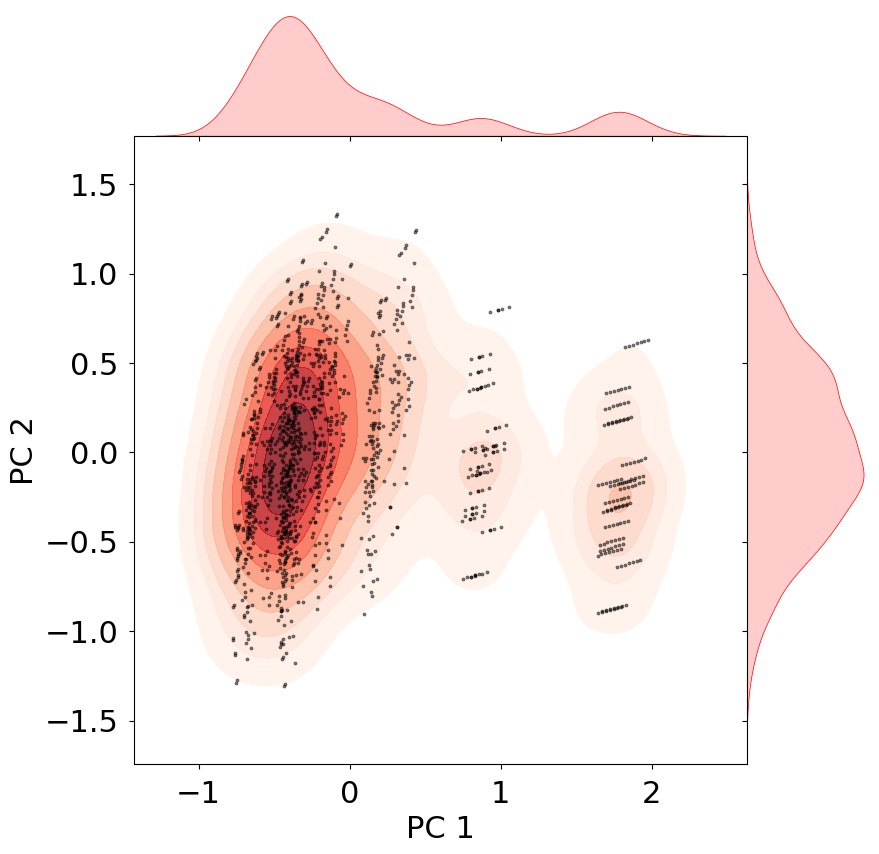

In [23]:
# fig = plt.figure(figsize=(10,10))
plt.rc('legend',fontsize=20)
plt.figure()

g = sns.jointplot(data=principalComponents_data_framed, x='PC 1', y='PC 2',
                  height=9, space=0, kind='kde',
                  marginal_kws={'color': 'r', 'linewidth': 0.5, 'alpha': 0.2}, fill=True,
                  cmap='Reds', shade=True, shade_lowest=False, alpha=0.8)
# palette=['blue', [0.1,1.0,1.0,1.0], 'orange', 'k', 'red'],
# hue='data_type',
# legend=False,
# g.ax_joint.collections[0].set_alpha(0)
g.plot_joint(plt.scatter, color='k', s=5, linewidth=0.5,  alpha=0.5)
g.savefig("joint_plot.png",dpi=200)

In [24]:
mathtext = ['$\it{h}$','$\it{k}$','$\it{l}$','${\Delta}CN$',
            '$\it{\epsilon}^\mathdefault{h}$','$\it{\epsilon}^\mathdefault{im}$','${\Delta}\it{\epsilon}$',
            '$\it{r}^\mathdefault{h}$','$\it{r}^\mathdefault{im}$','${\Delta}\it{r}$',
            '$PEN^{h}$','$PEN^{im}$','${\Delta}PEN$',
            '$IE^{h}$','$IE^{im}$','${\Delta}IE$',
            '$EA^{h}$','$EA^{im}$','${\Delta}EA$']
features_math = [[features[i], mathtext[i]] for i in range(len(features))]

## 3.PCA w.r.t. each feature

<ipython-input-25-c8957faa790e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

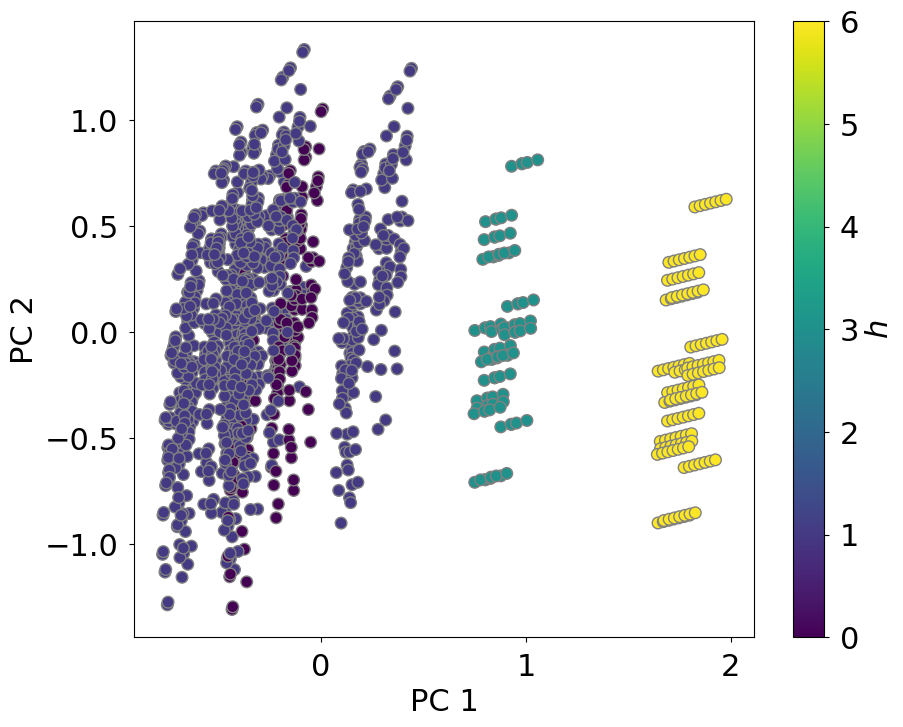

<Figure size 640x480 with 0 Axes>

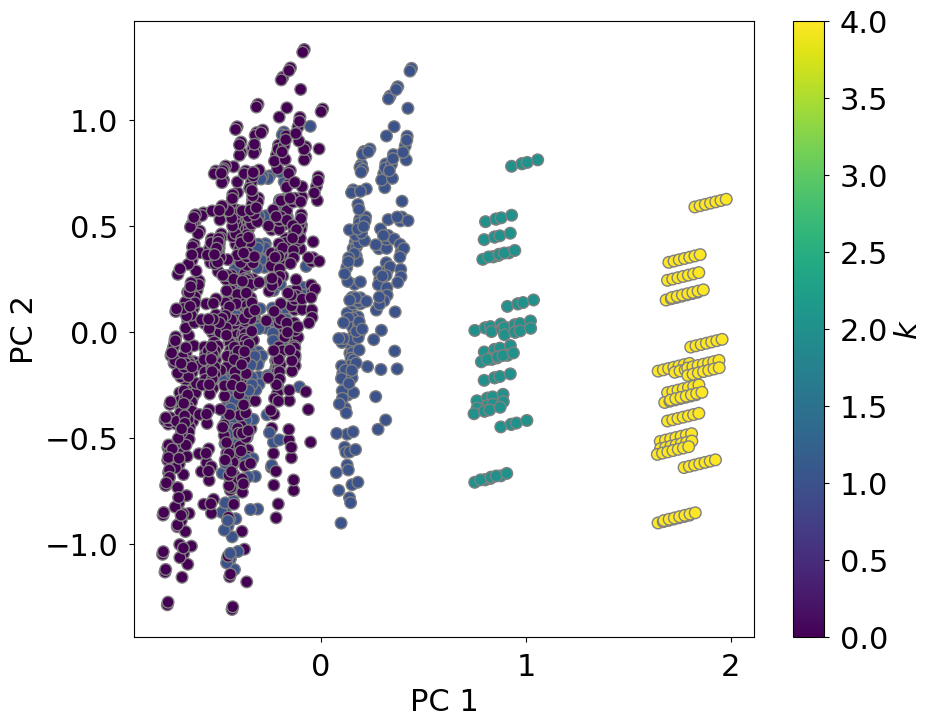

<Figure size 640x480 with 0 Axes>

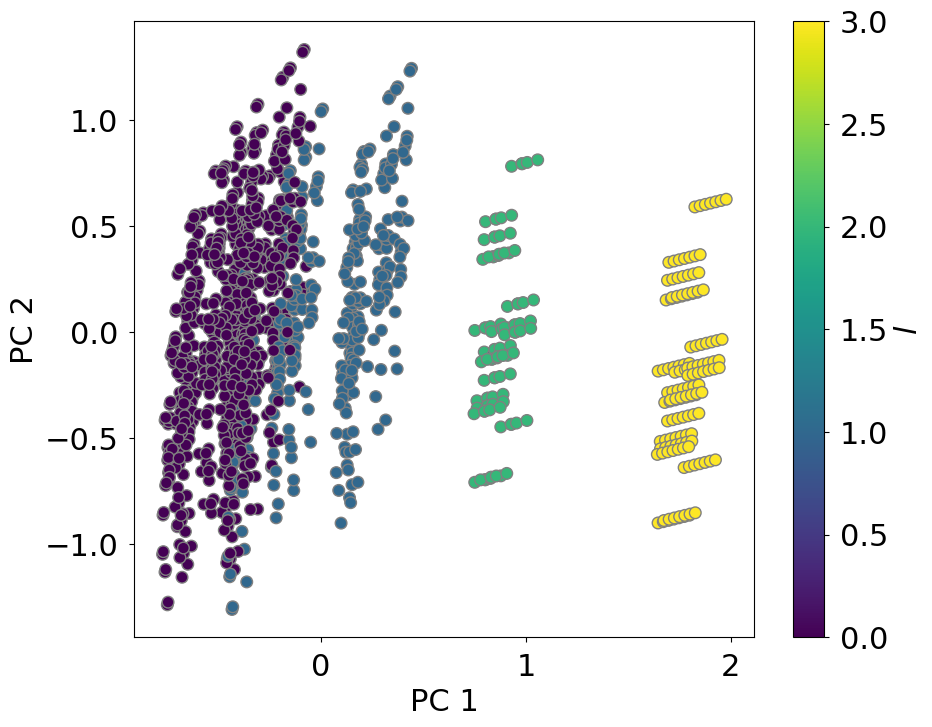

<Figure size 640x480 with 0 Axes>

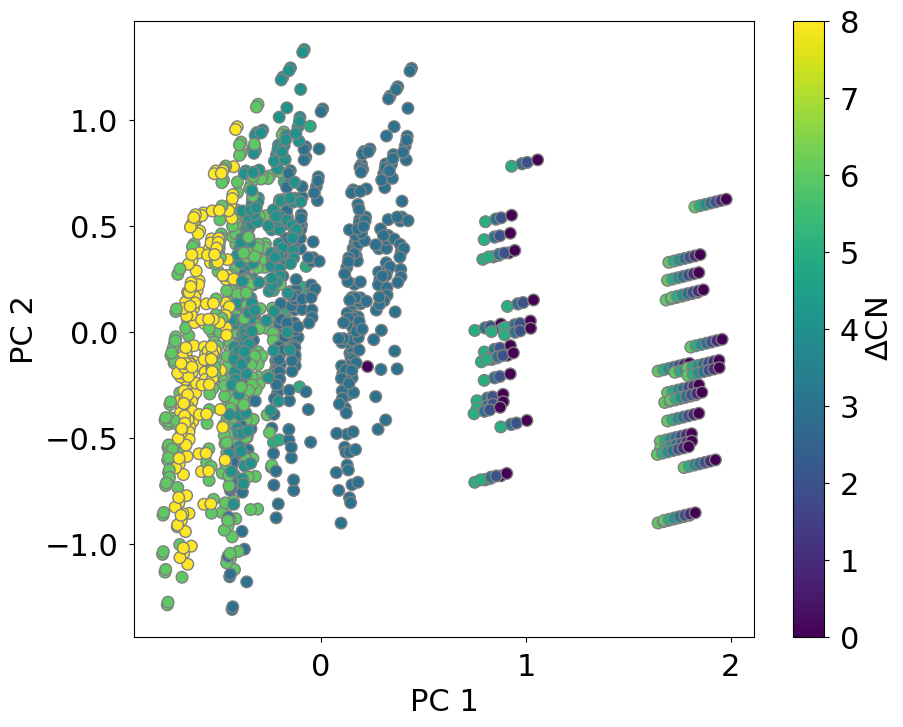

<Figure size 640x480 with 0 Axes>

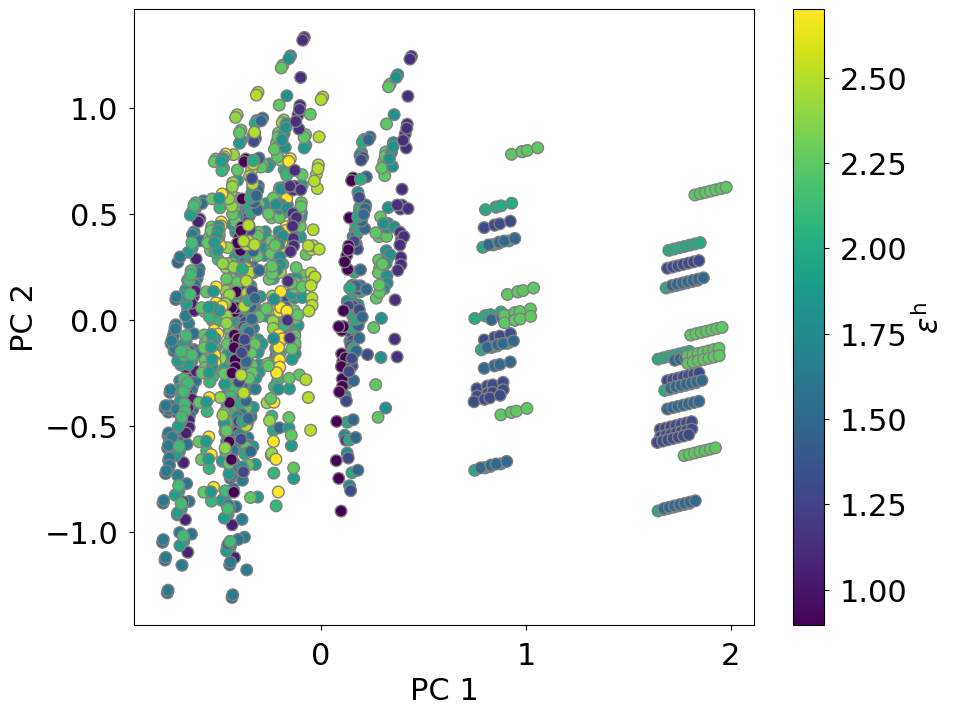

<Figure size 640x480 with 0 Axes>

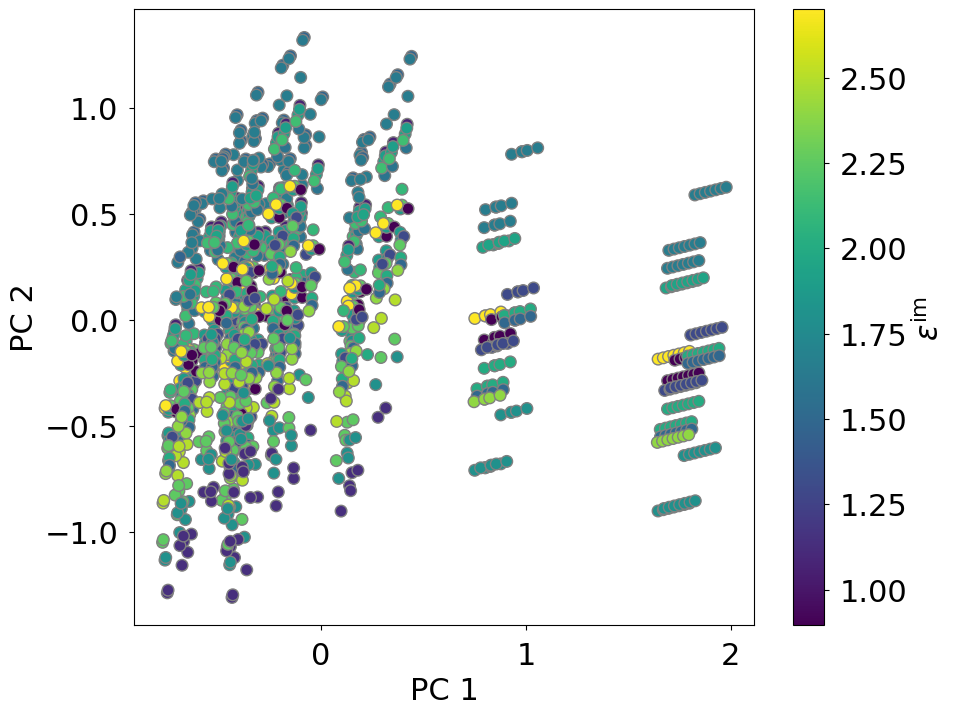

<Figure size 640x480 with 0 Axes>

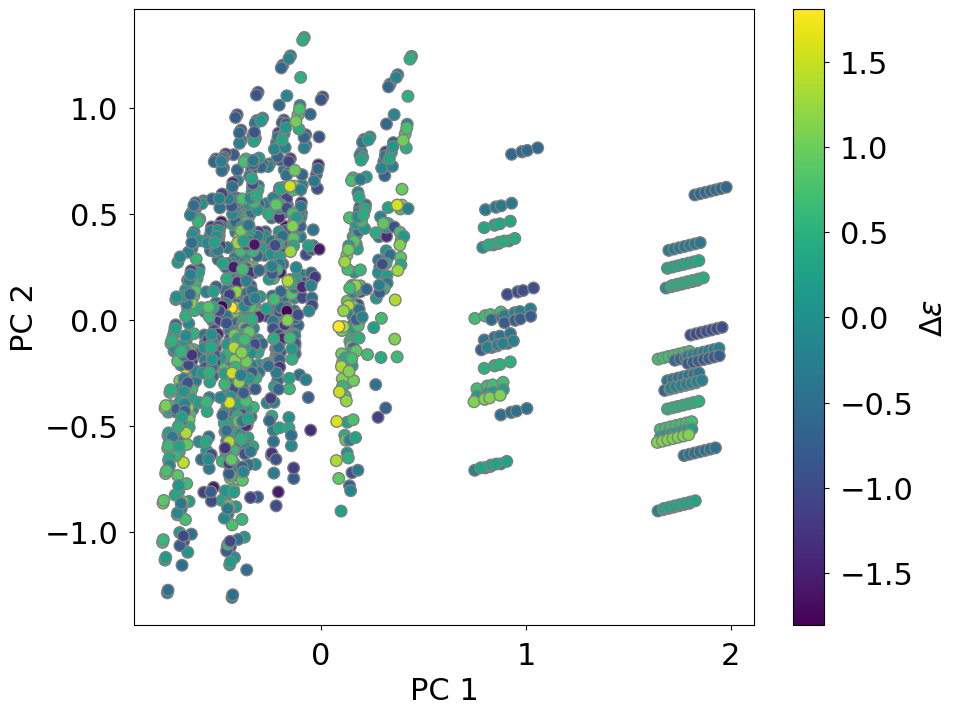

<Figure size 640x480 with 0 Axes>

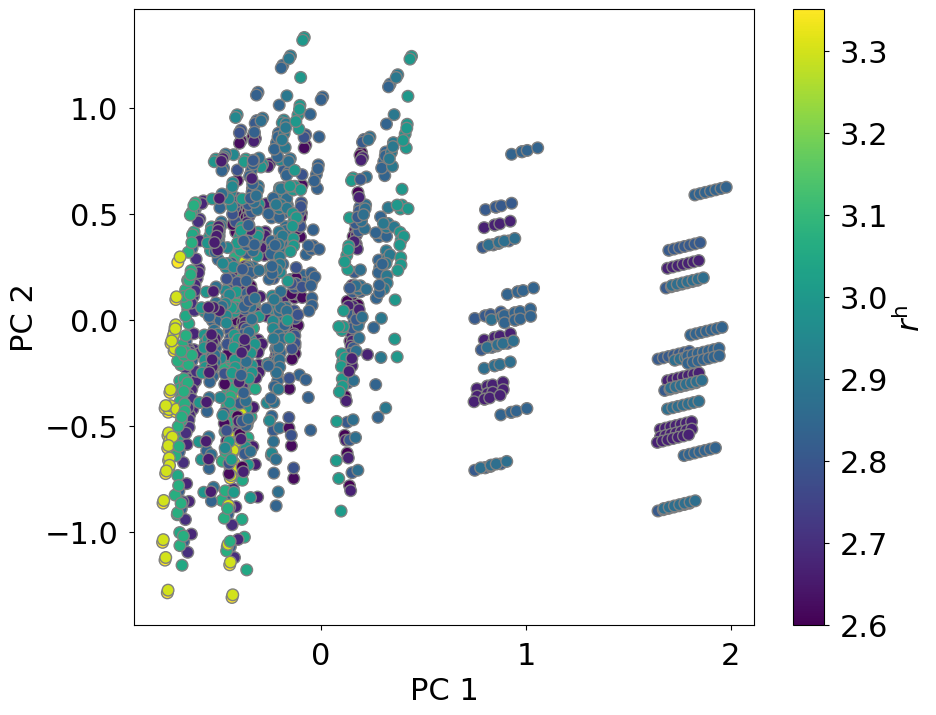

<Figure size 640x480 with 0 Axes>

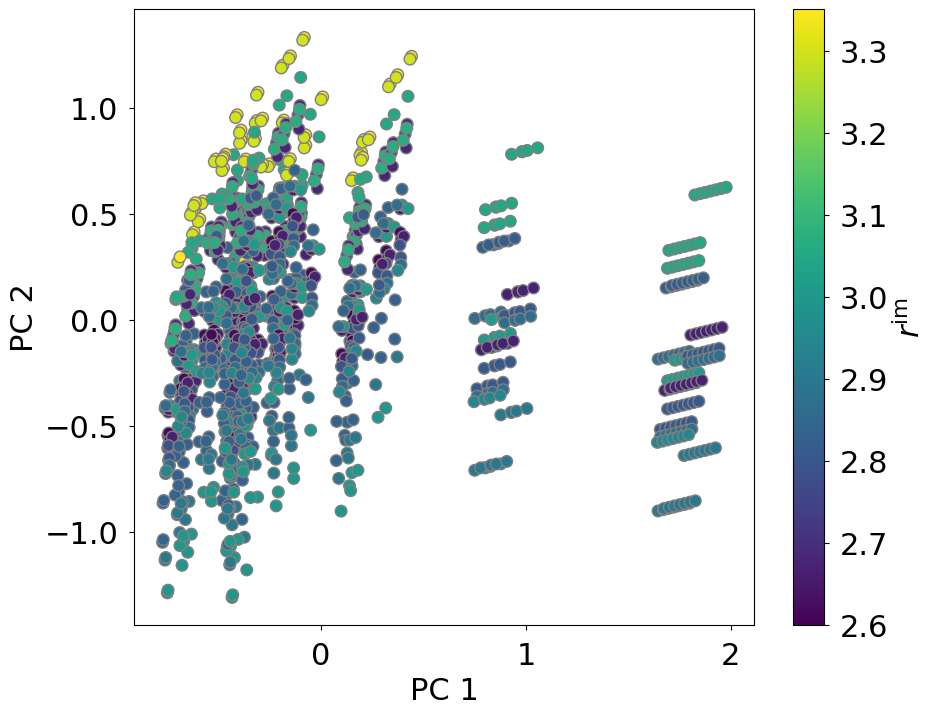

<Figure size 640x480 with 0 Axes>

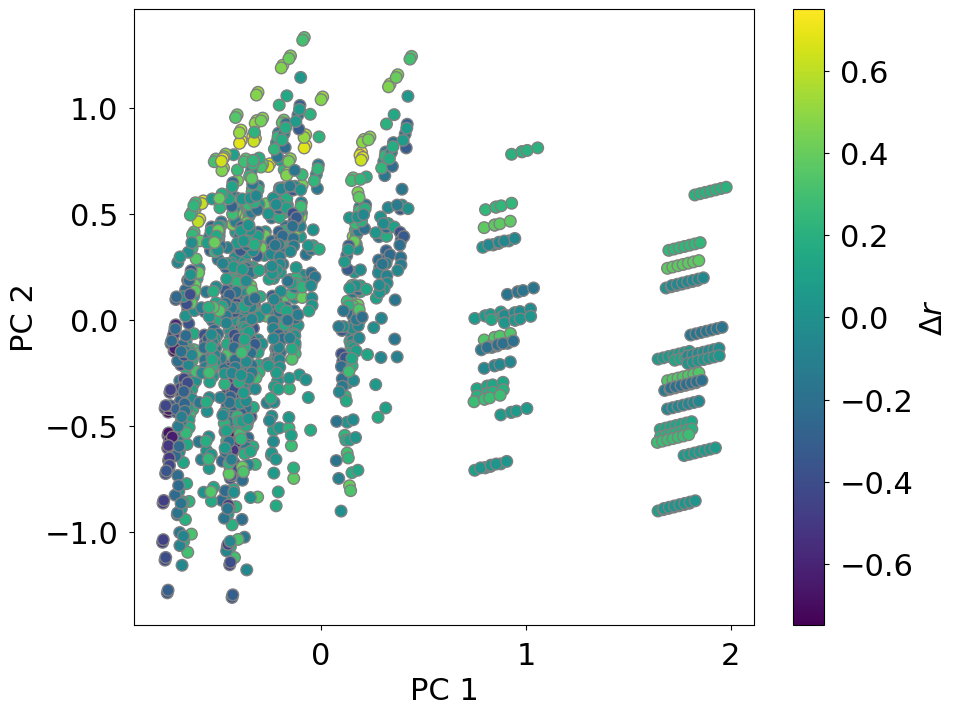

<Figure size 640x480 with 0 Axes>

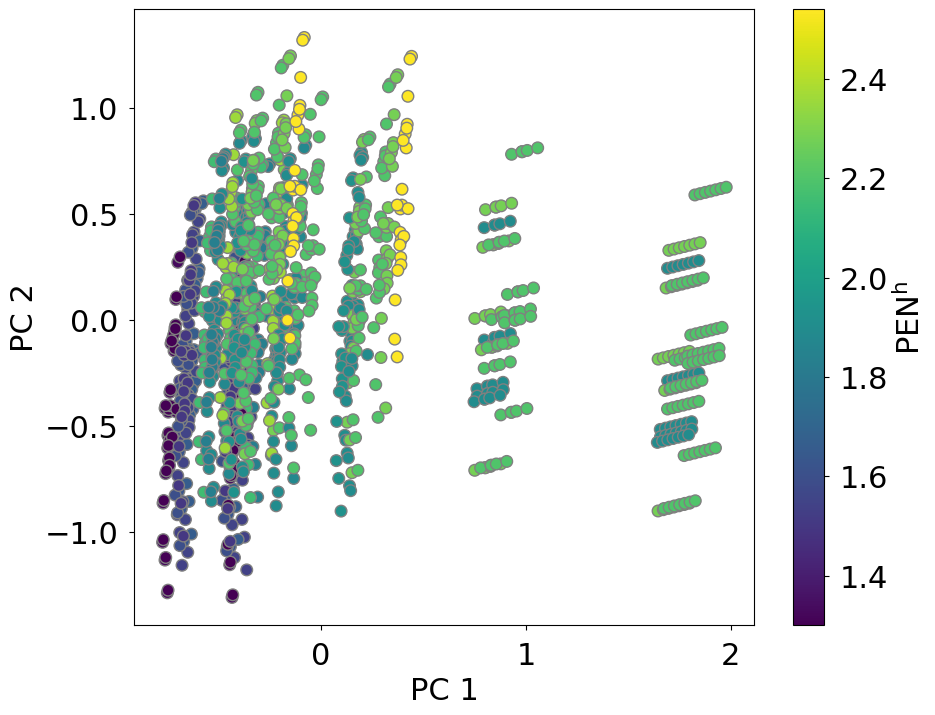

<Figure size 640x480 with 0 Axes>

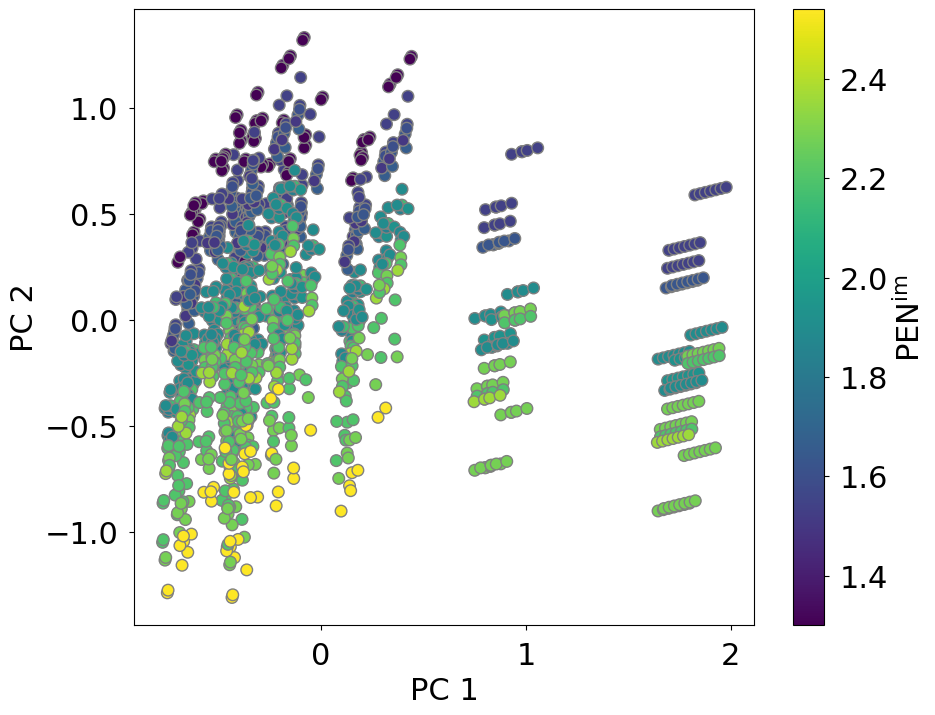

<Figure size 640x480 with 0 Axes>

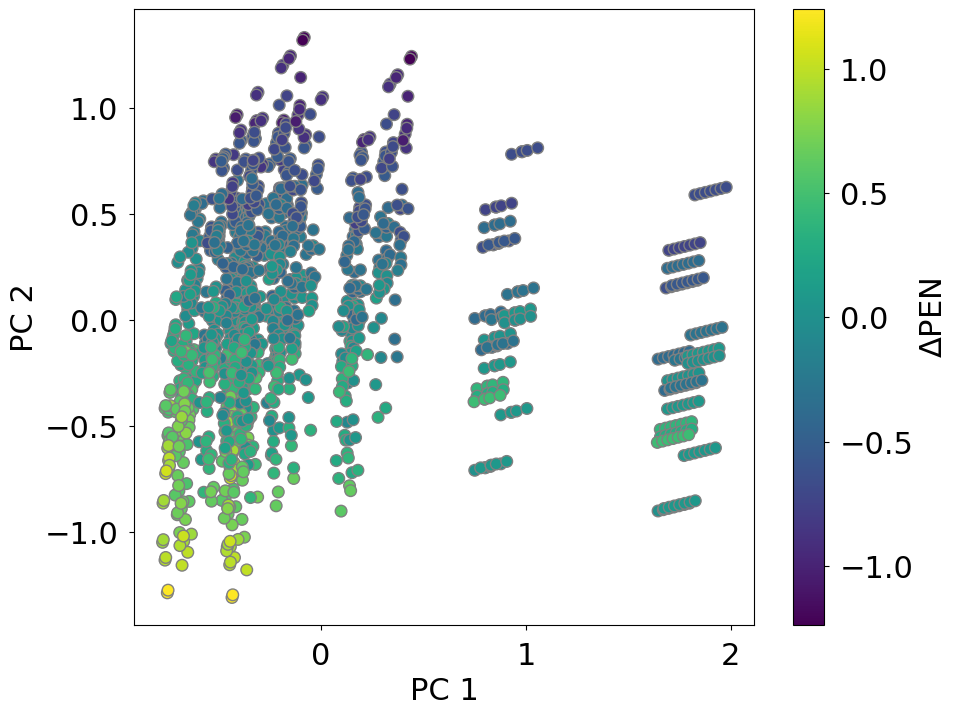

<Figure size 640x480 with 0 Axes>

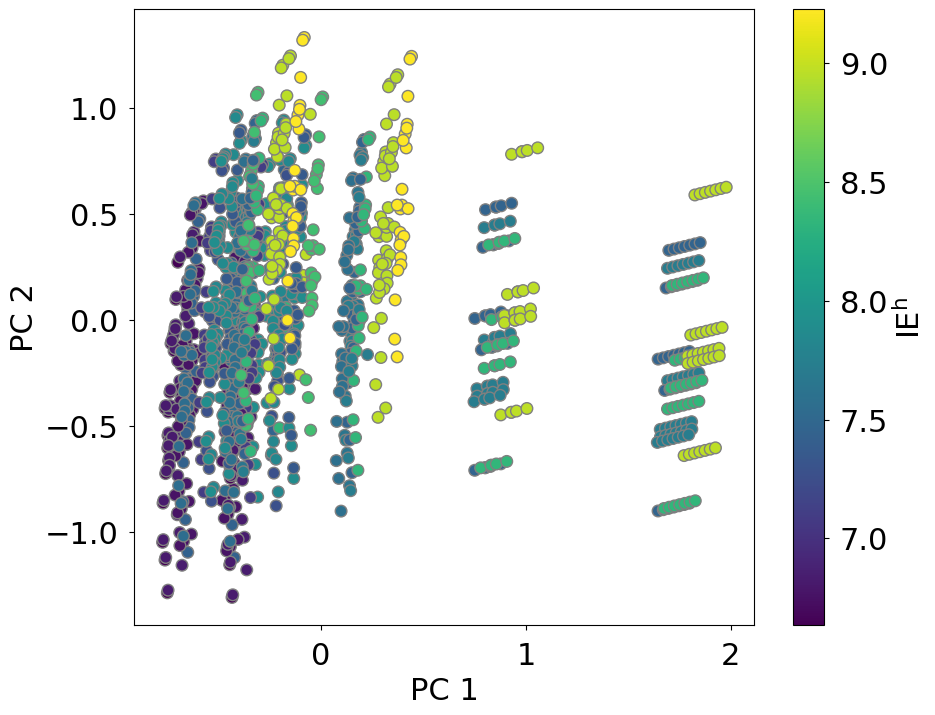

<Figure size 640x480 with 0 Axes>

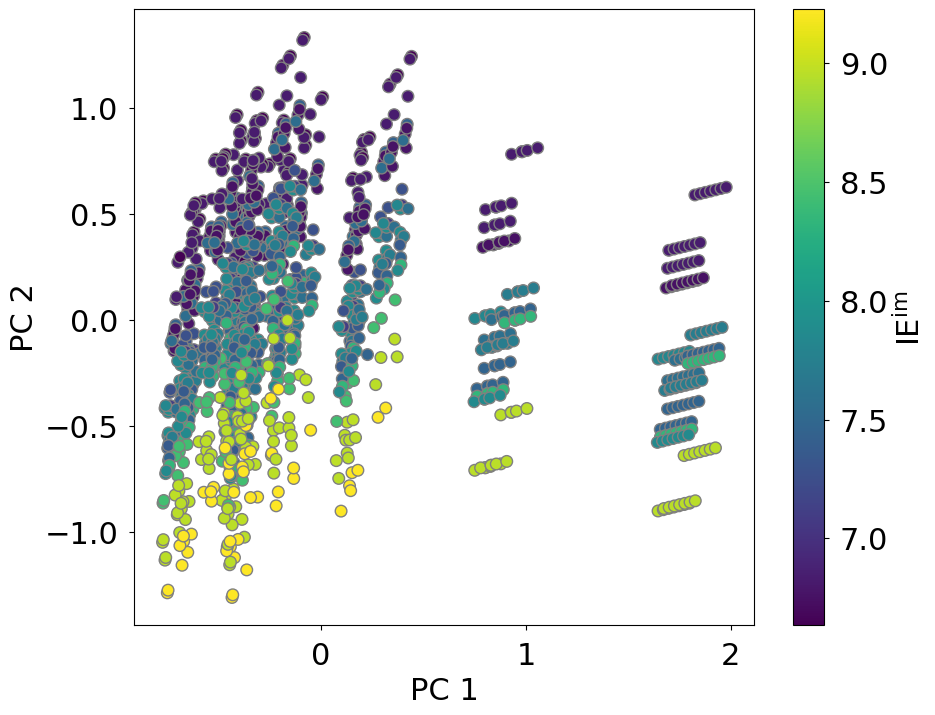

<Figure size 640x480 with 0 Axes>

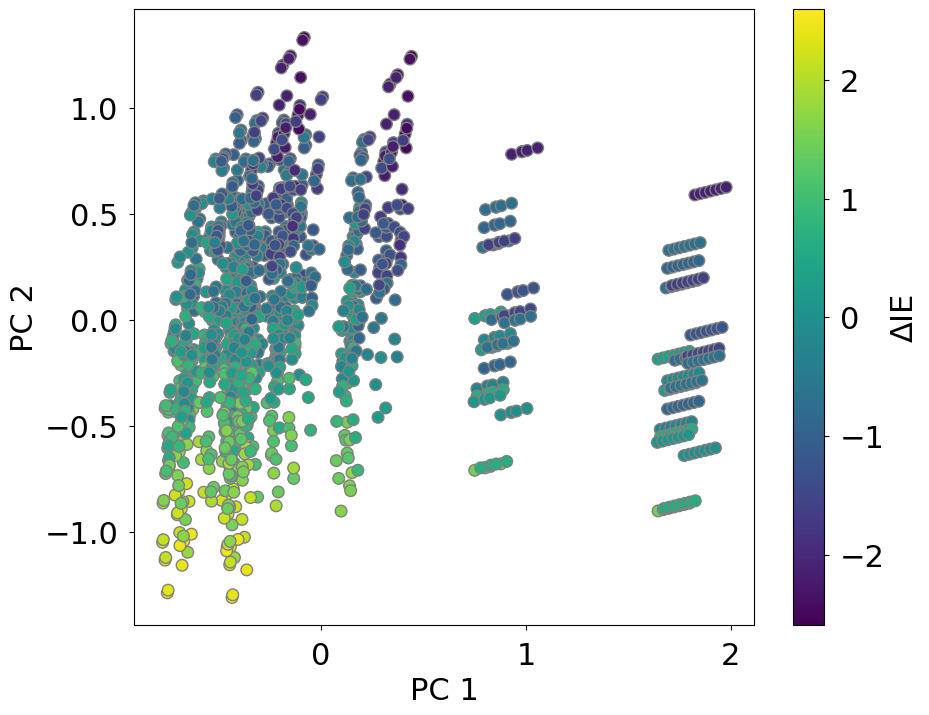

<Figure size 640x480 with 0 Axes>

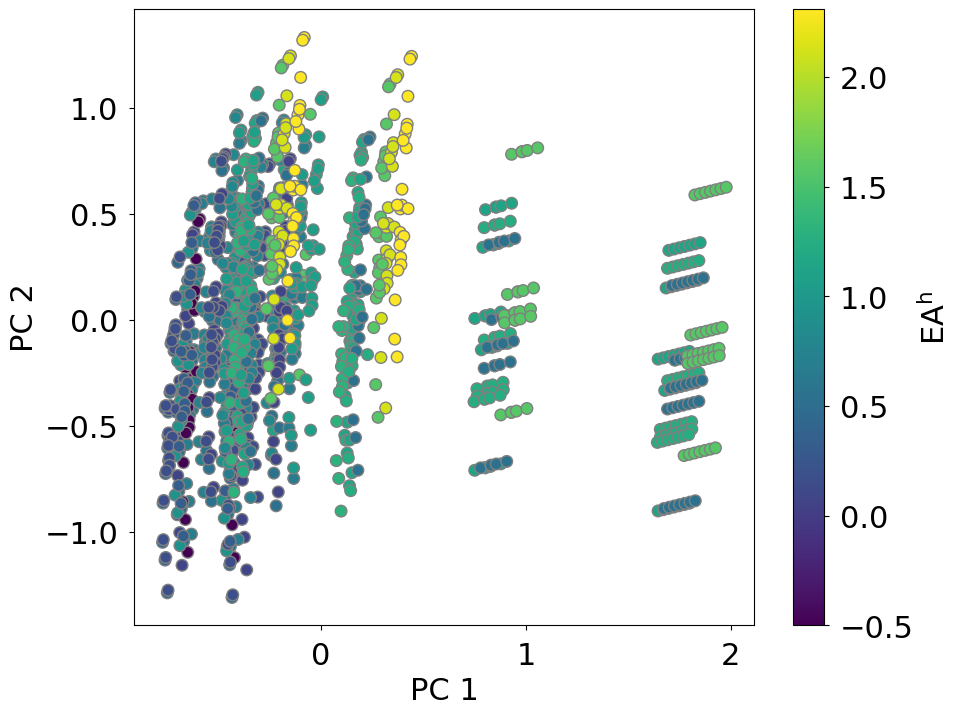

<Figure size 640x480 with 0 Axes>

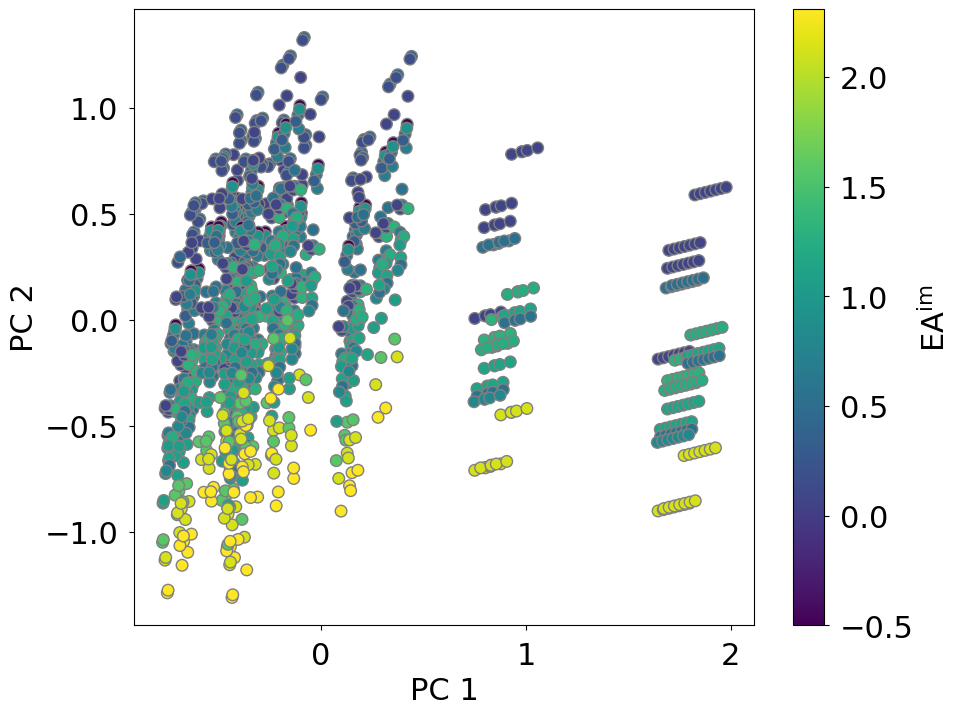

<Figure size 640x480 with 0 Axes>

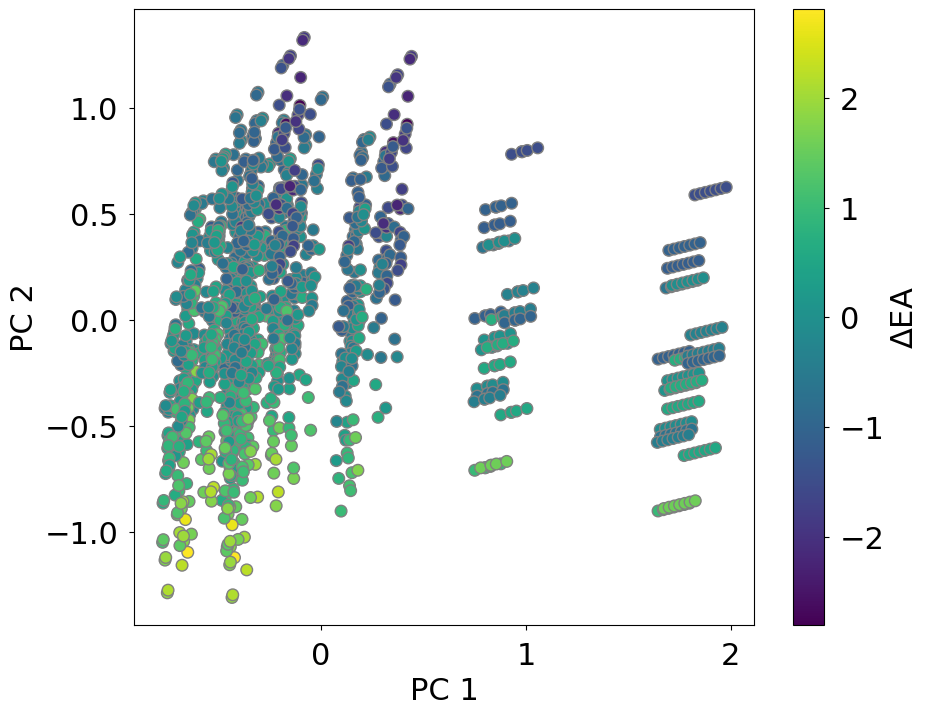

In [25]:
plt.rcParams["mathtext.default"] = "rm" # non-italic math fonts

for feature in features_math:
  plt.figure()
  plt.figure(figsize=(10,8))
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=14)
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  # plt.title("Principal Component Analysis of Surface Energy Dataset",fontsize=20)

  s=70 # marker size

  # training data (1226 data)
  plt.scatter(principalComponents_data_framed.loc[:1365, 'PC 1'],
             principalComponents_data_framed.loc[:1365, 'PC 2'],
             c=data_set_tot.loc[:1365,feature[0]].values,
             edgecolors='gray', s=s)

  # for idx in range(6):
  #   plt.text(principalComponents_data_framed.loc[1365+idx, 'PC 1']+0.02,
  #            principalComponents_data_framed.loc[1365+idx, 'PC 2']+0.02,
  #            s='{0:1.2f}'.format(data_set_expt.loc[idx, 'Esegr_expt']))

  # plt.xlim((.7, 1.0))
  # plt.ylim((-0.25,.15))
  cb = plt.colorbar()
  cb.set_label(feature[1])
  # plt.legend(loc='upper right', fontsize=12)
  # plt.show()
  fname='./{}.png'.format(feature[0])
  # fname='/content/drive/MyDrive/CCEL/machine_learning/220128_PCA_imgs/{}.png'.format(feature[0])
  plt.savefig(fname=fname, dpi=300)

## 4.Loading analysis of PC vectors

In [ ]:
loadings = DataFrame(pca_data.components_.T, columns=['PC1', 'PC2','PC3','PC4'], index=features)

PCs = ['PC1', 'PC2']
loadings.loc[:, PCs]
# loadings

PC1       PC2
h                 0.408499 -0.089221
k                 0.531055 -0.111516
l                 0.641807 -0.115950
del_CN           -0.203839 -0.048598
tension_host     -0.025286  0.072049
tension_impurity -0.041733 -0.057374
del_tension      -0.008224 -0.064712
radius_host      -0.083741 -0.084860
radius_impurity  -0.001916  0.160889
del_radius        0.040913  0.122875
PEN_host          0.163860  0.234517
PEN_impurity      0.019558 -0.431402
del_PEN          -0.072151 -0.332960
IE_host           0.173270  0.235865
IE_impurity       0.000919 -0.440780
del_IE           -0.086175 -0.338322
EA_host           0.117670  0.165507
EA_impurity       0.022970 -0.317580
del_EA           -0.047350 -0.241543


---
여기서 잠깐! loadings의 정체는 사실 data matrix의 covariance matrix (sigma)의 eigenvectors (서로 orthonormal함.) 임. 확인해보자!

In [ ]:
import numpy as np

In [ ]:
pc1 = np.array(loadings.loc[:,'PC1'])
pc2 = np.array(loadings.loc[:,'PC3'])
np.dot(pc1, pc2)

-2.667137344314341e-17

예상대로 내적하면 0이 나옴.

In [ ]:
print(np.linalg.norm(pc1),
      np.linalg.norm(pc2))

1.0 0.9999999999999996


orthonormal하므로 크기(norm)는 모두 1임.
또한 i번째 PC의 loading (또는 weight) 값들은 사실 i번째 eigenvector의 원래 p(feature수;여기서는 19)차원의 좌표계에서의 좌표임.

In [ ]:
loadings['Feature'] = features
loadings.loc[features] = loadings
# loadings

In [ ]:
extended_loadings = DataFrame(loadings['PC1'].append(loadings['PC2']))
extended_loadings.rename({'0':'loading'}, axis='columns')
extended_loadings.columns = ['loading']

In [ ]:
extended_loadings['whichPC'] = extended_loadings['loading']
extended_loadings['whichPC'][:19] = 'PC1'
extended_loadings['whichPC'][19:] = 'PC2'
extended_loadings['feature'] = extended_loadings.index
extended_loadings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


loading whichPC           feature
h                 0.408499     PC1                 h
k                 0.531055     PC1                 k
l                 0.641807     PC1                 l
del_CN           -0.203839     PC1            del_CN
tension_host     -0.025286     PC1      tension_host
tension_impurity -0.041733     PC1  tension_impurity
del_tension      -0.008224     PC1       del_tension
radius_host      -0.083741     PC1       radius_host
radius_impurity  -0.001916     PC1   radius_impurity
del_radius        0.040913     PC1        del_radius
PEN_host          0.163860     PC1          PEN_host
PEN_impurity      0.019558     PC1      PEN_impurity
del_PEN          -0.072151     PC1           del_PEN
IE_host           0.173270     PC1           IE_host
IE_impurity       0.000919     PC1       IE_impurity
del_IE           -0.086175     PC1            del_IE
EA_host           0.117670     PC1           EA_host
EA_impurity       0.022970     PC1       EA_impurity
del_EA           -0.047350     PC1            del_EA
h                -0.089221     PC2                 h
k                -0.111516     PC2                 k
l                -0.115950     PC2                 l
del_CN           -0.048598     PC2            del_CN
tension_host      0.072049     PC2      tension_host
tension_impurity -0.057374     PC2  tension_impurity
del_tension      -0.064712     PC2       del_tension
radius_host      -0.084860     PC2       radius_host
radius_impurity   0.160889     PC2   radius_impurity
del_radius        0.122875     PC2        del_radius
PEN_host          0.234517     PC2          PEN_host
PEN_impurity     -0.431402     PC2      PEN_impurity
del_PEN          -0.332960     PC2           del_PEN
IE_host           0.235865     PC2           IE_host
IE_impurity      -0.440780     PC2       IE_impurity
del_IE           -0.338322     PC2            del_IE
EA_host           0.165507     PC2           EA_host
EA_impurity      -0.317580     PC2       EA_impurity
del_EA           -0.241543     PC2            del_EA

[Text(0, 0, 'h'),
 Text(0, 0, 'k'),
 Text(0, 0, 'l'),
 Text(0, 0, 'del_CN'),
 Text(0, 0, 'tension_host'),
 Text(0, 0, 'tension_impurity'),
 Text(0, 0, 'del_tension'),
 Text(0, 0, 'radius_host'),
 Text(0, 0, 'radius_impurity'),
 Text(0, 0, 'del_radius'),
 Text(0, 0, 'PEN_host'),
 Text(0, 0, 'PEN_impurity'),
 Text(0, 0, 'del_PEN'),
 Text(0, 0, 'IE_host'),
 Text(0, 0, 'IE_impurity'),
 Text(0, 0, 'del_IE'),
 Text(0, 0, 'EA_host'),
 Text(0, 0, 'EA_impurity'),
 Text(0, 0, 'del_EA')]

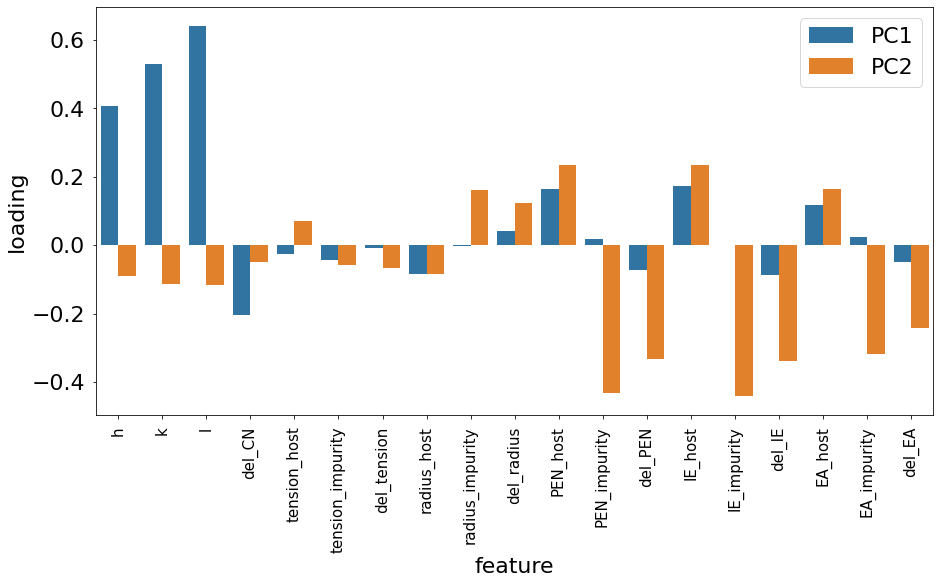

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5] # [width, height] (inches)
import seaborn as sns
fig = sns.barplot(data=extended_loadings,
                  x='feature',
                  y='loading',
                  hue='whichPC',
                  ci=None)
plt.legend(loc='upper right',
           title=None)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=15)